### Logistic Regression
- Data Preparation
- Visualisation
- Create test and train data
- Create a logistic regression model
- Predictions
- Decision Boundary
- How to use Sk-learn

In [31]:
# Data Generation using Numpy

import numpy as np
import matplotlib.pyplot as plt

In [32]:
mean_O1 = np.array([1, 0.5])
cov_O1 = np.array([[1, 0.1], [0.1, 1.2]])

mean_O2 = np.array([4, 5])
cov_O2 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_O1 = np.random.multivariate_normal(mean_O1, cov_O1, 500)
dist_O2 = np.random.multivariate_normal(mean_O2, cov_O2, 500)

print(dist_O1.shape, dist_O2.shape)

(500, 2) (500, 2)


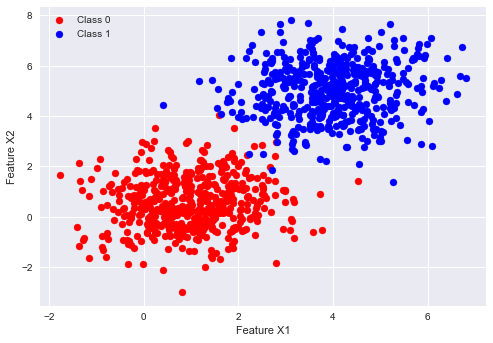

In [33]:
plt.style.use('seaborn')

plt.scatter(dist_O1[ : , 0], dist_O1[ : , 1], color = 'red', label = 'Class 0')
plt.scatter(dist_O2[ : , 0], dist_O2[ : , 1], color = 'blue', label = 'Class 1')

plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

plt.legend()
plt.show()

In [34]:
data = np.zeros((1000, 3))

In [35]:
data[ : 500, : 2] = dist_O1
data[500 : , : 2] = dist_O2

data[500 : , -1] = 1

In [36]:
# Randomly Shuffle Data

np.random.shuffle(data)
print(data[ : 10])

[[-0.92967415  2.28756043  0.        ]
 [ 1.93937514 -0.49679097  0.        ]
 [ 1.58381355  0.15746313  0.        ]
 [ 3.7464958   3.94452213  1.        ]
 [ 3.92626356  4.80441485  1.        ]
 [ 4.76143974  6.21948805  1.        ]
 [ 2.15742972  1.86901524  0.        ]
 [ 4.62195891  5.89917801  1.        ]
 [ 4.59060781  4.4095844   1.        ]
 [ 5.82026183  6.84755247  1.        ]]


In [37]:
# Divide the data into train and test part

split = int(0.8 * data.shape[0])

X_train = data[ : split, : -1]
X_test = data[split : , : -1]

Y_train = data[ : split, -1]
Y_test = data[split : , -1]

In [38]:
print(Y_test)

[0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1.]


### Plot the training data and Normalize it 

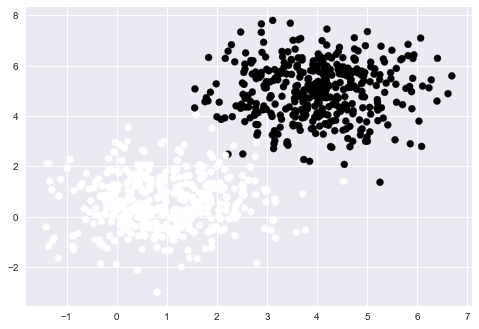

In [39]:
plt.scatter(X_train[ : , 0], X_train[ : , 1], c = Y_train)
plt.show()

In [40]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

In [41]:
print(x_mean)
print(x_std)

[2.47395994 2.74520404]
[1.81788155 2.47400512]


In [42]:
X_train = (X_train - x_mean) / x_std
X_test = (X_test - x_mean) / x_std

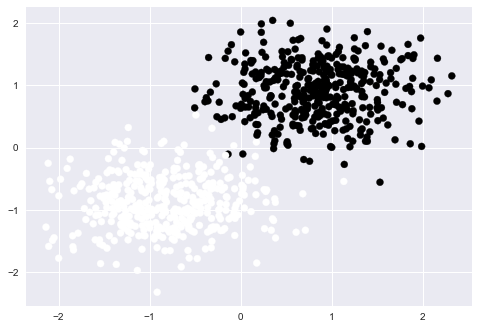

In [43]:
plt.scatter(X_train[ : , 0], X_train[ : , 1], c = Y_train)
plt.show()

In [44]:
print(X_train.mean(axis = 0))
print(X_train.std(axis = 0))

[4.56058802e-16 8.79712969e-16]
[1. 1.]


In [50]:
a = np.linspace(-10, 10, 20)

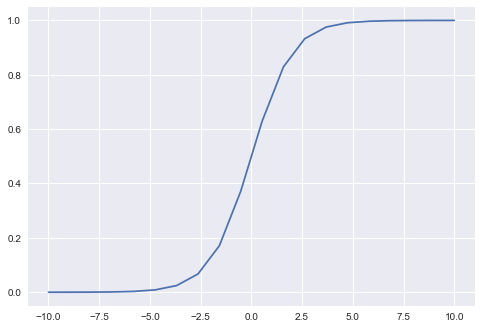

In [51]:
plt.plot(a, sigmoid(a))

### Logistic Regression Implementation

In [47]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [48]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [52]:
def error(X, y, theta):
    h = hypothesis(X, theta)
    e = -1 * np.mean((y * np.log(h) + ((1 - y) * np.log(1 - h))))
    return e

In [53]:
def gradient(X, y, theta):
    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hi))
    m = X.shape[0]
    return grad / m

In [54]:
def gradient_descent(X, y, lr = 0.1, max_itrs = 500):
    n = X.shape[1]
    theta = np.zeros((n, 1))
    
    error_list = []
    
    for i in range(max_itrs):
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        theta = theta - lr * grad
    
    return theta, error_list

In [60]:
ones = np.ones((X_train.shape[0], 1))

X_new_train = np.hstack((ones, X_train))
print(X_new_train.shape)

Y_train = Y_train.reshape((-1, 1))

(800, 3)


In [61]:
theta, error_list = gradient_descent(X_new_train, Y_train)

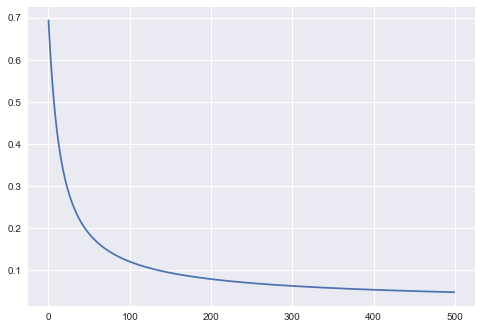

In [62]:
plt.plot(error_list)

### Visualize the decision surface

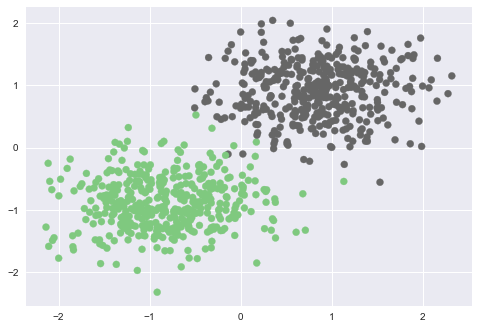

In [64]:
plt.scatter(X_train[ : , 0], X_train[ : , 1], c = Y_train.reshape((-1, )), cmap = plt.cm.Accent)
plt.show()

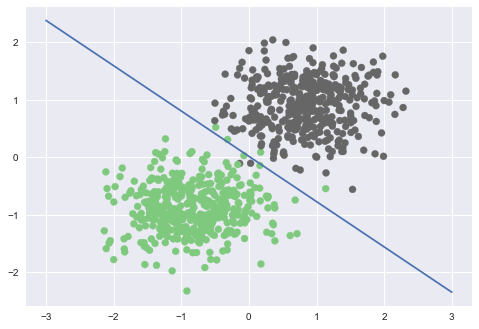

In [66]:
x1 = np.arange(-3, 4)
x2 = -(theta[0] + theta[1] *x1) / theta[2]

plt.plot(x1, x2)
plt.scatter(X_train[ : , 0], X_train[ : , 1], c = Y_train.reshape((-1, )), cmap = plt.cm.Accent)

plt.show()

### Predictions and Accuracy

In [99]:
X_new_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_new_test.shape)
print(X_new_test[ : 3, : ])

(200, 3)
[[ 1.         -1.26724358 -1.43777513]
 [ 1.          0.70133335  1.0959026 ]
 [ 1.         -0.73263367 -0.71822405]]


In [100]:
Y_test = Y_test.reshape((-1, 1))

In [101]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)
    
    output[h >= 0.5] = 1
    output = output.astype('int')
    return output

In [102]:
XT_predicts = predict(X_new_train, theta)
Xt_predicts = predict(X_new_test, theta)

In [103]:
def accuracy(actual, preds):
    actual = actual.astype('int')
    acutal = actual.reshape((-1, 1))
    acc = np.sum(actual == preds) / actual.shape[0]
    return acc * 100

In [104]:
train_acc = accuracy(Y_train, XT_predicts)
test_acc = accuracy(Y_test, Xt_predicts)

print(train_acc, test_acc)

99.25 98.5


### Sklearn for Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model = LogisticRegression()

In [108]:
model.fit(X_train, Y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [111]:
theta_0 = model.intercept_
theta_s = model.coef_

print(theta_0, theta_s)

[-0.13085365] [[3.00387094 4.40135493]]


In [112]:
model.score(X_train, Y_train)

0.9925

In [113]:
model.score(X_test, Y_test)

0.985

In [114]:
y_pred = model.predict(X_test)

In [115]:
y_pred

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.])